# 파일 다운로드

In [1]:
import sys
from pandas import read_csv, pivot_table, melt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# origin1 = read_csv('C:/Users/kimjh/산대특_데이터분석 알고리즘 개발/megaIT_da/2차 프로젝트/시간대별 카드 이용금액 현황_제주데이터랩(180101-231031).csv')
# origin2 = read_csv('C:/Users/kimjh/산대특_데이터분석 알고리즘 개발/megaIT_da/2차 프로젝트/업종별성별외식업이용정보_제주데이터랩(180101-231031).csv')
origin = read_csv('../../파일/종현/업종별성별카드이용정보_제주데이터랩(180101-231031).csv', encoding='euc-kr')

In [4]:
origin.head()

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
0,201801,건강보조식품 소매업,기타외국,알수없음,65,78,101523250
1,201801,건강보조식품 소매업,내국인,남성,159,165,25558470
2,201801,건강보조식품 소매업,내국인,알수없음,1,1,396000
3,201801,건강보조식품 소매업,내국인,여성,200,218,32041740
4,201801,건강보조식품 소매업,동남아,알수없음,8,8,1550000


In [5]:
origin.tail()

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
20639,202310,휴양콘도 운영업,법인,알수없음,2084,4413,2208853529
20640,202310,휴양콘도 운영업,제주도민,남성,897,1118,64997332
20641,202310,휴양콘도 운영업,제주도민,알수없음,1,1,4000
20642,202310,휴양콘도 운영업,제주도민,여성,967,1169,86172869
20643,202310,휴양콘도 운영업,중국,알수없음,63,76,6297800


In [6]:
origin['이용자구분'].value_counts()

이용자구분
내국인     6376
제주도민    5616
법인      2795
중국      1878
기타외국    1865
일본      1113
동남아     1001
Name: count, dtype: int64

In [7]:
origin['업종명'].unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업',
       '기타 갬블링 및 베팅업', '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업',
       '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓',
       '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업',
       '일식 음식점업', '자동차 임대업', '전시 및 행사 대행업', '정기 항공 운송업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자, 햄버거, 샌드위치 및 유사 음식점업',
       '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '택시 운송업',
       '기타음?식료품위주종합소매업'], dtype=object)

In [8]:
숙박 = ['여관업', '휴양콘도 운영업', '호텔업']
식비 = ['서양식 음식점업', '일식 음식점업','비알콜 음료점업', '피자, 햄버거, 샌드위치 및 유사 음식점업', 
      '기타 외국식 음식점업', '한식 음식점업', '중식 음식점업', '기타 주점업', '체인화 편의점','일반유흥 주점업', 
      '육류 소매업', '빵 및 과자류 소매업', '과실 및 채소 소매업', '기타음식료품위주종합소매업', '수산물 소매업']
교통 = ['내항 여객 운송업', '자동차 임대업', '정기 항공 운송업', '차량용 주유소 운영업', '차량용 가스 충전업', '택시 운송업']
레져 = ['그외 기타 분류안된 오락관련 서비스업', '기타 수상오락 서비스업', '골프장 운영업', '그외 기타 스포츠시설 운영업', 
      '스포츠 및 레크레이션 용품 임대업', '기타 갬블링 및 베팅업']
기념품 = ['면세점', '관광 민예품 및 선물용품 소매업', '화장품 및 방향제 소매업', '건강보조식품 소매업']
여행사업 = ['여행사업']
기타대형종합소매업 = ['기타 대형 종합 소매업']

In [9]:
# 범주형으로 변경
origin['이용자구분'] = origin['이용자구분'].astype('category')
origin['성별'] = origin['성별'].astype('category')
origin['업종명'] = origin['업종명'].astype('category')

In [10]:
# 복사본 생성
df = origin.copy()

In [14]:
# 조건 1) 제주도민을 제외한 전부는 여행객으로 설정
df = df.query('이용자구분 != "제주도민"')

# 조건 2) 2019년 01월 ~ 2019년 12월까지만 
df = df.query('연월 >= 201901' and '연월 <= 201912')

In [15]:

# 숙박업

pivot_숙박2019 = pivot_table(df,
                     index= '연월',
                     columns= '업종명',
                     values='이용자수',
                     aggfunc='sum')
pivot_숙박2019.reset_index(inplace=True)
pivot_숙박2019

업종명,연월,건강보조식품 소매업,골프장 운영업,과실 및 채소 소매업,관광 민예품 및 선물용품 소매업,그외 기타 분류안된 오락관련 서비스업,그외 기타 스포츠시설 운영업,그외 기타 종합 소매업,기타 갬블링 및 베팅업,기타 대형 종합 소매업,...,중식 음식점업,차량용 가스 충전업,차량용 주유소 운영업,체인화 편의점,택시 운송업,"피자, 햄버거, 샌드위치 및 유사 음식점업",한식 음식점업,호텔업,화장품 및 방향제 소매업,휴양콘도 운영업
0,201801,627,9158,24711,20413,79,486,12895,22,41923,...,20187,8006,120472,333275,0,40676,411035,11377,6973,13647
1,201802,774,8026,20901,16068,77,386,11195,26,36398,...,16270,6568,102997,282373,0,36207,339401,9868,6576,9665
2,201803,812,16420,26836,20627,64,574,11453,30,38108,...,20103,7645,121303,335699,0,38533,421077,10688,6835,11760
3,201804,1135,20034,33622,25862,63,888,12365,17,37659,...,20652,7078,123454,359531,0,41367,450429,11580,7442,14350
4,201805,1001,21492,27708,25445,119,987,13379,18,40549,...,21416,7351,127309,401743,0,44924,457057,13730,8178,15800
5,201806,852,20499,28790,24615,88,912,13387,9,40601,...,21617,7312,129183,419990,0,46772,466734,13171,7759,15392
6,201807,746,15662,23350,23390,85,774,15844,57,46794,...,22587,7608,137266,453308,0,52450,483350,14313,8994,14432
7,201808,719,17428,25866,26065,161,1083,16666,17,49319,...,24828,8257,148146,511692,5,58484,527429,16911,9271,20331
8,201809,1041,16850,28696,20590,76,845,14817,25,39351,...,20719,6807,125889,404924,0,45480,429147,12214,7257,13105
9,201810,1081,21075,30993,22020,68,883,12723,20,37547,...,22214,6778,124079,396679,2,42462,439579,13265,7152,13904


In [ ]:
mtmp = melt(pivot_숙박2019,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 숙박,    # 재배치하고자 하는 변수
           value_name='이용객수' 
           )
mtmp

,연월,업종명,이용객수
0,201801,여관업,32221
1,201802,여관업,24868
2,201803,여관업,29738
3,201804,여관업,34492
4,201805,여관업,35089
...,...,...,...
67,201908,호텔업,16452
68,201909,호텔업,11361
69,201910,호텔업,13669
70,201911,호텔업,12665


In [ ]:
# ---------------------------------------
# 숙박업
# ---------------------------------------
숙박2019 = df.copy()

pivot_숙박2019 = pivot_table(숙박2019,
                     index= '연월',
                     columns= '업종명',
                     values='이용자수',
                     aggfunc='sum')
pivot_숙박2019.reset_index(inplace=True)

m숙박 = melt(pivot_숙박2019,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 숙박,    # 재배치하고자 하는 변수
           value_name='이용객수' 
           )

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬

# ---------------------------------------
# 식비
# ---------------------------------------
식비2019 = df.copy()
pivot_식비2019 = pivot_table(식비2019,
                     index= '연월',
                     columns='업종명',
                     values='이용자수',
                     aggfunc='sum')

m식비 = melt(pivot_식비2019,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 식비,    # 재배치하고자 하는 변수
           value_name='이용객수' 
           )

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬

# ---------------------------------------
# 교통
# ---------------------------------------
교통2019 = df.copy()
pivot_교통2019 = pivot_table(교통2019,
                     index= '연월',
                     columns='업종명',
                     values='이용자수',
                     aggfunc='sum')

m교통 = melt(pivot_교통2019,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 교통,    # 재배치하고자 하는 변수
           value_name='이용객수' 
           )

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬

# ---------------------------------------
# 레져
# ---------------------------------------
레져2019 = df.copy()
pivot_레져2019 = pivot_table(레져2019,
                     index= '연월',
                     columns='업종명',
                     values='이용자수',
                     aggfunc='sum')

m레져 = melt(pivot_레져2019,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 레져,    # 재배치하고자 하는 변수
           value_name='이용객수' 

           )

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬
# ---------------------------------------
# 기념품
# ---------------------------------------
기념품2019 = df.copy()
pivot_기념품2019 = pivot_table(기념품2019,
                     index= '연월',
                     columns='업종명',
                     values='이용자수',
                     aggfunc='sum')

m기념품 = melt(기념품2019,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= 기념품,    # 재배치하고자 하는 변수
           value_name='이용객수' 

           )

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬
# # ---------------------------------------
# # 여행사업
# 여행사업2019 = df.copy()

# # ---------------------------------------
# # 기타대형종합소매업
# 기타대형종합소매업2019 = df.copy()

KeyError: '연월'

In [ ]:
pivot1 = pivot_table(숙박2019,
                     index= '연월',
                     columns='업종명',
                     values='이용자수',
                     aggfunc='sum')
pivot1.head()

업종명,건강보조식품 소매업,골프장 운영업,과실 및 채소 소매업,관광 민예품 및 선물용품 소매업,그외 기타 분류안된 오락관련 서비스업,그외 기타 스포츠시설 운영업,그외 기타 종합 소매업,기타 갬블링 및 베팅업,기타 대형 종합 소매업,기타 수상오락 서비스업,...,중식 음식점업,차량용 가스 충전업,차량용 주유소 운영업,체인화 편의점,택시 운송업,"피자, 햄버거, 샌드위치 및 유사 음식점업",한식 음식점업,호텔업,화장품 및 방향제 소매업,휴양콘도 운영업
연월,,,,,,,,,,,,,,,,,,,,,
201801,627,9158,24711,20413,79,486,12895,22,41923,14,...,20187,8006,120472,333275,0,40676,411035,11377,6973,13647
201802,774,8026,20901,16068,77,386,11195,26,36398,15,...,16270,6568,102997,282373,0,36207,339401,9868,6576,9665
201803,812,16420,26836,20627,64,574,11453,30,38108,15,...,20103,7645,121303,335699,0,38533,421077,10688,6835,11760
201804,1135,20034,33622,25862,63,888,12365,17,37659,41,...,20652,7078,123454,359531,0,41367,450429,11580,7442,14350
201805,1001,21492,27708,25445,119,987,13379,18,40549,32,...,21416,7351,127309,401743,0,44924,457057,13730,8178,15800


In [ ]:
pivot1.value_counts()

건강보조식품 소매업  골프장 운영업  과실 및 채소 소매업  관광 민예품 및 선물용품 소매업  그외 기타 분류안된 오락관련 서비스업  그외 기타 스포츠시설 운영업  그외 기타 종합 소매업  기타 갬블링 및 베팅업  기타 대형 종합 소매업  기타 수상오락 서비스업  기타 외국식 음식점업  기타 주점업  기타음식료품위주종합소매업  내항 여객 운송업  마사지업  면세점    버스 운송업  비알콜 음료점업  빵 및 과자류 소매업  서양식 음식점업  수산물 소매업  슈퍼마켓    스포츠 및 레크레이션 용품 임대업  여관업    여행사업  욕탕업   육류 소매업  일반유흥 주점업  일식 음식점업  자동차 임대업  전시 및 행사 대행업  정기 항공 운송업  중식 음식점업  차량용 가스 충전업  차량용 주유소 운영업  체인화 편의점  택시 운송업  피자, 햄버거, 샌드위치 및 유사 음식점업  한식 음식점업  호텔업    화장품 및 방향제 소매업  휴양콘도 운영업
627         9158     24711        20413              79                    486              12895         22            41923         14            10033        2887    35285          5277       67    80170  1       52957     46860        74658     20353    134509  8212                32221  1556  7328  9089    6850      24207    18828    30137        30479      20187    8006        120472       333275   0       40676                    411035   11377  6973           13647       1
719         17428    25866       

In [ ]:
#증감률이랑 막대그래프로

In [ ]:
pivot1['휴양콘도 운영업']

연월
201801    13647
201802     9665
201803    11760
201804    14350
201805    15800
201806    15392
201807    14432
201808    20331
201809    13105
201810    13904
201811    11947
201812    10200
Name: 휴양콘도 운영업, dtype: int64

In [ ]:
tmp2=pivot1[['호텔업', '여관업', '휴양콘도 운영업']]
tmp2

업종명,호텔업,여관업,휴양콘도 운영업
연월,,,
201801,14690,40007,16411
201802,12676,31690,12035
201803,13482,37025,14187
201804,14003,41643,15975
201805,16621,42671,18382
201806,15485,45179,17571
201807,17089,47036,16772
201808,20038,50704,26289
201809,14660,38868,15590


In [ ]:
tmp2.reset_index(inplace=True)

In [ ]:
tmp2.set_index('index', inplace=True)

In [ ]:
tmp2['연월'] = tmp2['연월'].astype('category')

In [ ]:
mtmp = melt(tmp2,  # 미리 일부만 지정
           id_vars = '연월',                      # 유지해야할 변수
           value_vars= ['호텔업', '여관업', '휴양콘도 운영업'],    # 재배치하고자 하는 변수
           value_name='이용객수' 

           )

# mtmp.sort_values('이름') # 이름을 기준으로 내림차순 정렬

In [ ]:
mtmp

,연월,업종명,value
0,201801,호텔업,14690
1,201802,호텔업,12676
2,201803,호텔업,13482
3,201804,호텔업,14003
4,201805,호텔업,16621
5,201806,호텔업,15485
6,201807,호텔업,17089
7,201808,호텔업,20038
8,201809,호텔업,14660
9,201810,호텔업,15812


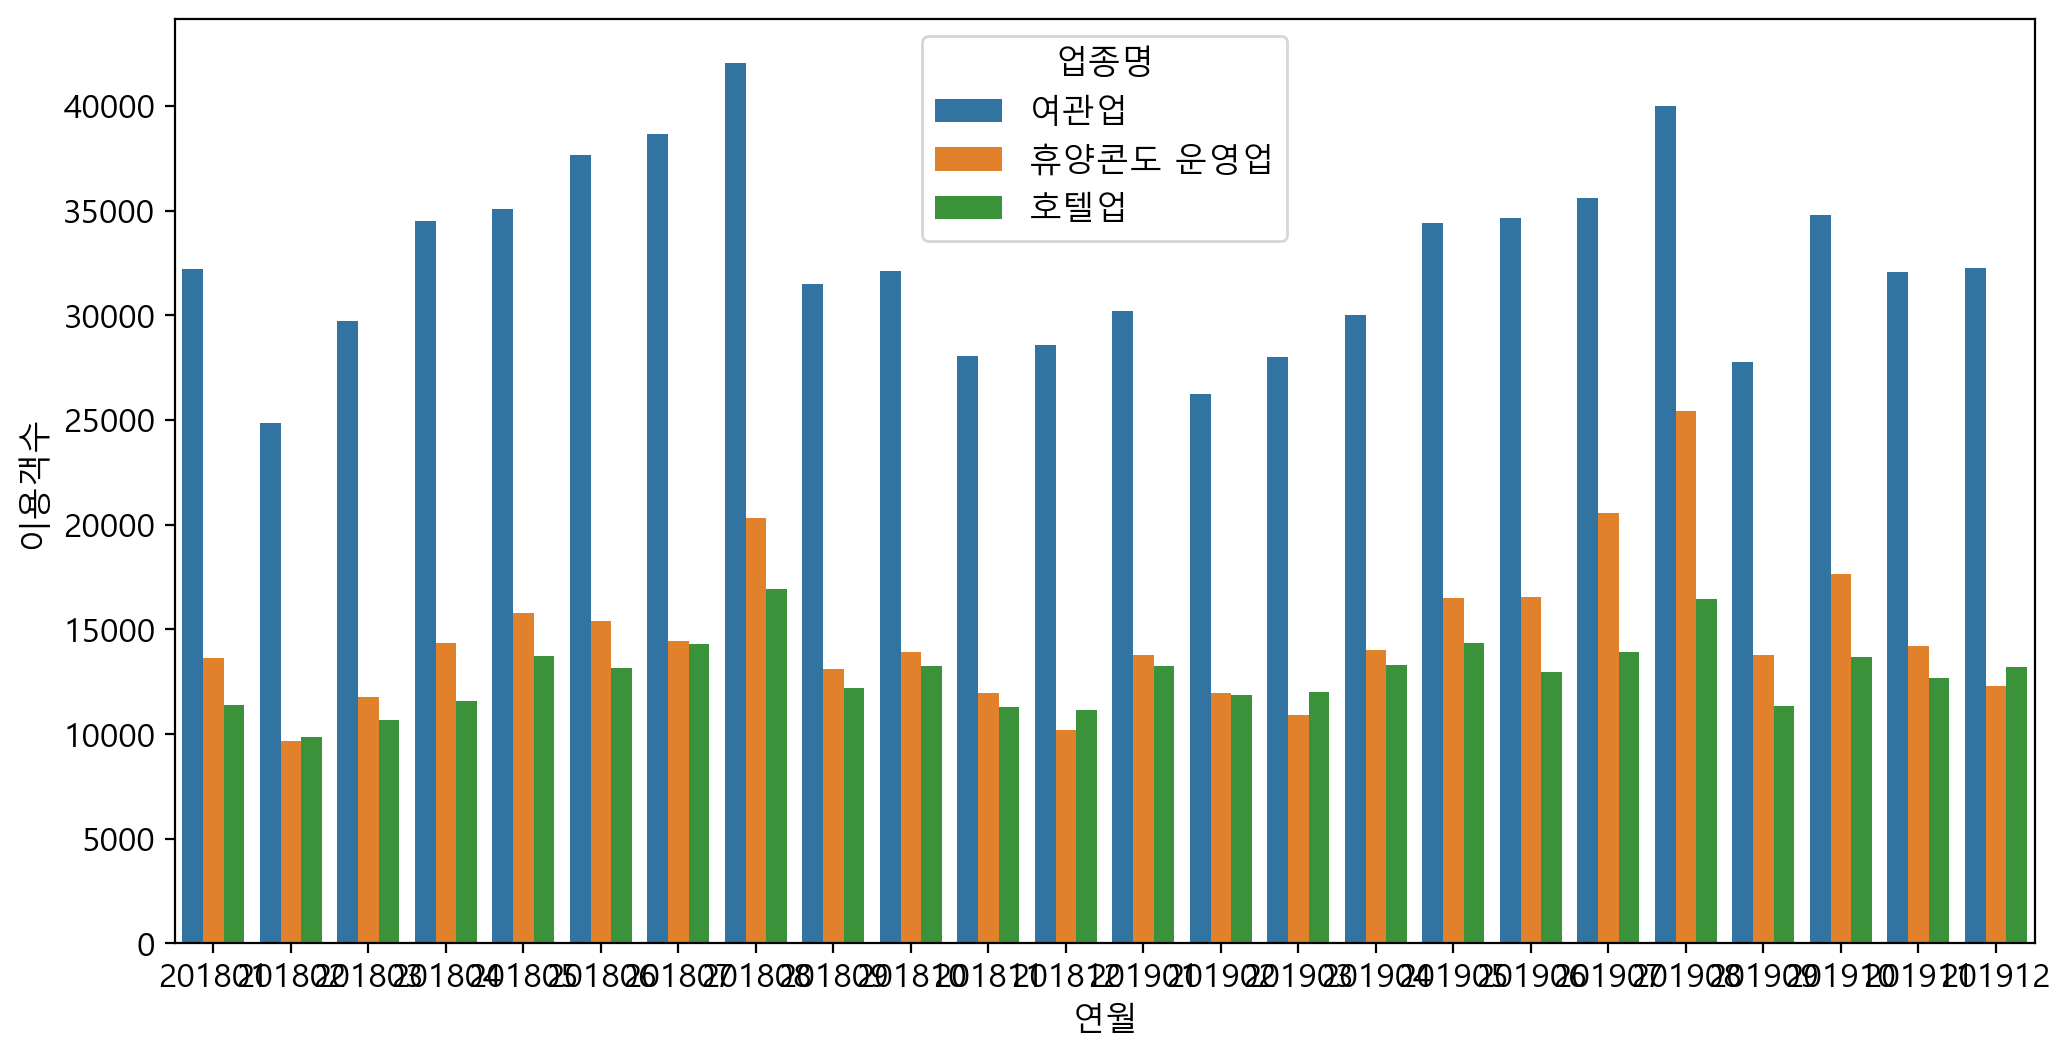

In [ ]:
plt.figure()
sns.barplot(data=mtmp, x='연월', y='이용객수', hue='업종명')
plt.show()
plt.close()

In [ ]:
1. 숙박 및 음식점업(55-56)
(2) 음식점업
'서양식 음식점업', 
'일식 음식점업', 
'피자, 햄버거, 샌드위치 및 유사 음식점업',
'기타 외국식 음식점업',
'한식 음식점업',
'중식 음식점업',

(3) 주점업
'비알콜 음료점업', 
'일반유흥 주점업',
'기타 주점업', 



In [ ]:
2. 예술, 스포츠 및 여가관련 서비스업
(1) 스포츠 및 오락관련 서비스업
'그외 기타 분류안된 오락관련 서비스업',
'기타 수상오락 서비스업', 
'그외 기타 스포츠시설 운영업', 
'골프장 운영업', 

(2) 유원지 및 기타 오락관련 서비스업
'기타 갬블링 및 베팅업',


2. 임대업(부동산 제외)
(1) 개인 및 가정용품 임대업
'스포츠 및 레크레이션 용품 임대업',





In [ ]:
(2) 운송장비 임대업
'자동차 임대업', 
 


In [ ]:
# 패키지?? 문화생활?? 전시관 드읃으

3. 사업 지원 서비스업
(1) 사업 지원 서비스업
'여행사업',
'전시 및 행사 대행업', 


In [ ]:

3. 소매업(47-)
(1) 대형 종합 소매업(대형마트)
'기타 대형 종합 소매업',

(2) 음식료품 위주 종합 소매업
'슈퍼마켓', 
'체인화 편의점',
'기타음식료품위주종합소매업',

(4) 그외 기타 종합 소매업
'그외 기타 종합 소매업',


In [ ]:
# 기념품????

3. 소매업(47-)
(3) 면세점
'면세점',

(6) 기타 상품 소매업
'화장품 및 방향제 소매업',
'관광 민예품 및 선물용품 소매업', 

In [ ]:
# 제주도에서 소비하는 식대. 고기 굽고~
3. 소매업(47-)
(5) 음,식료품 및 담배 소매업
'육류 소매업',
'건강 보조식품 소매업', 
'빵 및 과자류 소매업',  
'과실 및 채소 소매업',
'수산물 소매업', 


In [ ]:
# 관광지내 이동
3. 소매업(47-)

(7) 연료 소매업
'차량용 주유소 운영업',
'차량용 가스 충전업',


In [ ]:
# 제주도로 이동 혹은 제주도서 내 이동

4. 운송업
'택시 운송업'
'내항 여객 운송업'(배)
'정기 항공 운송업'(비행기), 

In [ ]:
5. 기타 개인 서비스 업
(1) 개인 서비스 업
'욕탕업', 
'마사지업', 

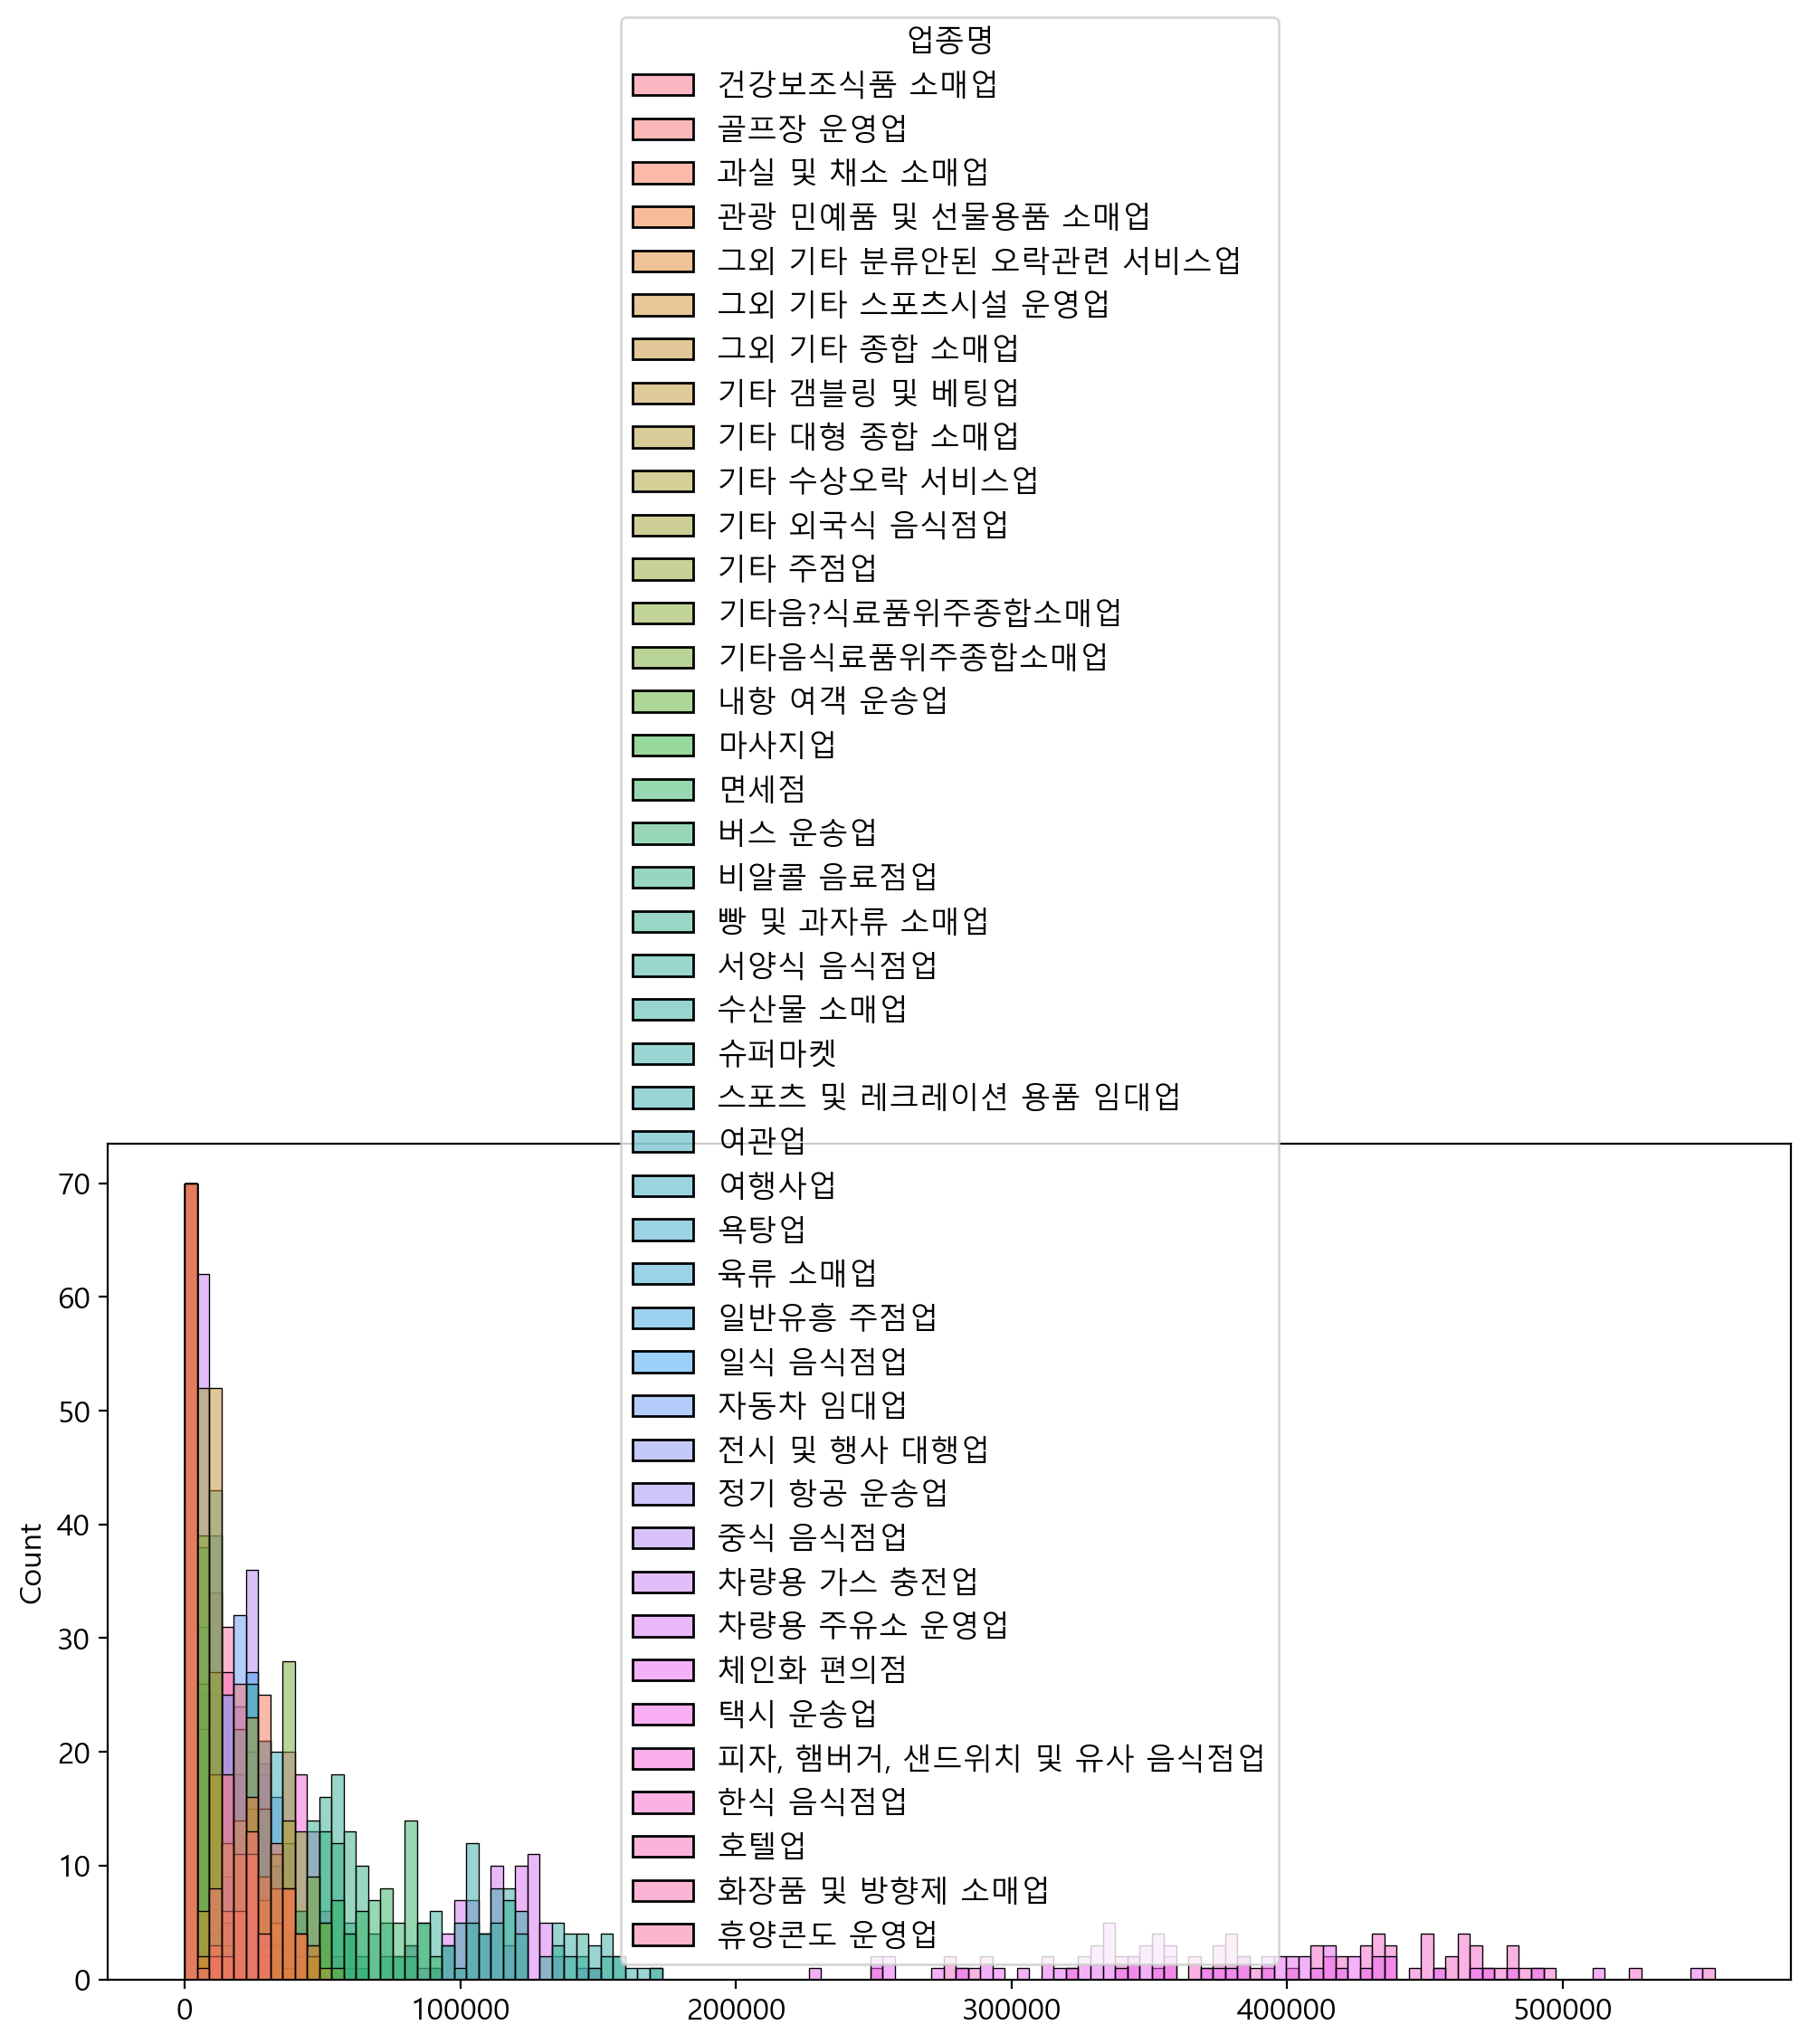

In [ ]:
plt.figure()
sns.histplot(data=pivot1)
plt.show()
plt.close()